C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Accuracy stats of Regression Tree Model : 
Accuracy with a margin of 100$ :  1.0
Accuracy with a margin of 50$ :  0.995475113122172
Accuracy with a margin of 25$ :  0.9728506787330317
Accuracy with a margin of 10$ :  0.9502262443438914


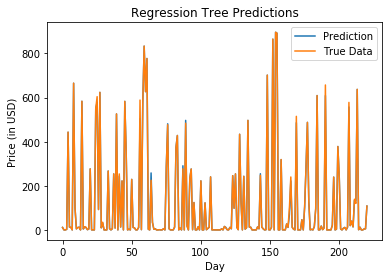

Average error :  1.7104801744


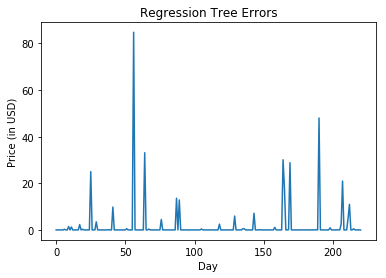

In [1]:
'''
Regression Tree
'''

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

def init():
    # Load input data
    ipdata = pandas.read_csv("C://Users//User//Desktop//ML//Project//bitcoin_dataset.csv",  parse_dates=['Date'])

    # Drop rows with NaN
    for key in ipdata:
        try:
            ipdata = ipdata[np.isfinite(ipdata[key])]
        except:
            pass

    ipdata['next'] = pandas.Series([0] * len(ipdata['btc_market_price']), index = ipdata.index)
    ipdata = ipdata.drop('btc_trade_volume', 1)

    for ind in ipdata.index:
        try:
            ipdata.ix[ind, 'next'] = ipdata['btc_market_price'][ind+1]
        except:
            if ind == max(ipdata.index):
                pass

    return ipdata.drop([max(ipdata.index)])

def accuracyStats(l1, l2, *args):
    levels = set([100, 50, 25, 10])
    for l in args:
        levels.add(l)
    
    levels = list(levels)
    levels.sort(reverse=True)
    for l in levels:
        print("Accuracy with a margin of", str(l) + "$ : ", accuracy(l1, l2, l))
        
def accuracy(predicted, actual, margin=100):

    if len(predicted) != len(actual):
        raise ValueError('"predicted list" and "actual" list are of unequal lengths!')

    total = len(predicted)
    correct = 0
    for p, a in zip(predicted, actual):
        if math.fabs(p - a) < margin:
            correct += 1

    return (correct/total)

def plot_results(predicted_data, true_data, title='', xlab='', ylab=''):
 
    plt.title(title)
    plt.plot(range(len(predicted_data)), predicted_data, label='Prediction')
    plt.plot(range(len(true_data)), true_data, label='True Data')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend()
    plt.show()
    return


data = init()
ndata = data.drop('Date', 1)   

nrow1 = int(ndata.shape[0]*0.8)     # 80% of the data for training 
nrow2 = int(ndata.shape[0]*0.2)     # 20% of the data for testing

train_data = ndata      
test_data = ndata
train_data = ndata.sample(n = nrow1)    # training data
test_data = ndata.sample(n = nrow2)     # testing data

model = tree.DecisionTreeRegressor()    
model = model.fit(train_data.drop('next', 1), train_data['next'])   # fit the model
res = model.predict(test_data.drop('next', 1))  

print('Accuracy stats of Regression Tree Model : ')
accuracyStats(res, test_data['next'])
plot_results(res, test_data['next'], 'Regression Tree Predictions', 'Day', 'Price (in USD)')

errors = [math.fabs(x-y) for x,y in zip(res, test_data['next'])]
print("Average error : ", np.average(errors))
plt.plot(errors)
plt.title('Regression Tree Errors')
plt.xlabel('Day')
plt.ylabel('Price (in USD)')
plt.show()

